# TP 2

### Exercice 1:

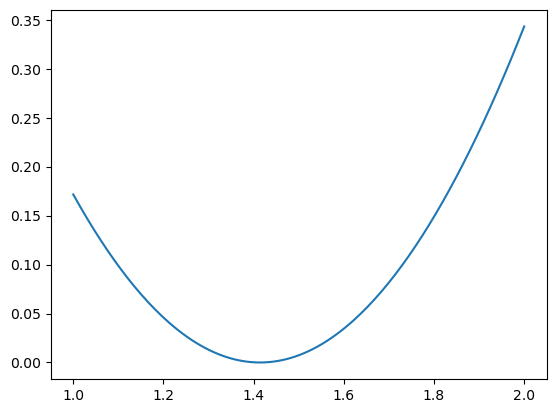

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x) :
    return (x - np.sqrt(2))**2

x=np.linspace(1,2,200)
plt.plot(x,f(x))


### Question 1:
#### Passer de [a,b] à [a,y] revient à avoir $longueur(I) = y-a = (b-a)/\tau$
#### Passer de [a,b] à [x,b] revient à avoir $longueur(I) = b_x = $

### Question 2:

In [2]:
def section(f, a0, b0, tol):
    a = a0
    b= b0
    count=0
    t = (1+5**0.5)/2
    while b - a > tol :
        x = a + (b-a)/t**2
        y = a + (b-a)/t
        if f(x)< f(y):
            a, b = a, y
        else:
            a, b = x, b
        count +=1
    return (a+b)/2, count

section(f,1,2,0.003)

        

(1.4142619343463463, 13)

(0.6565411518764196, 13)

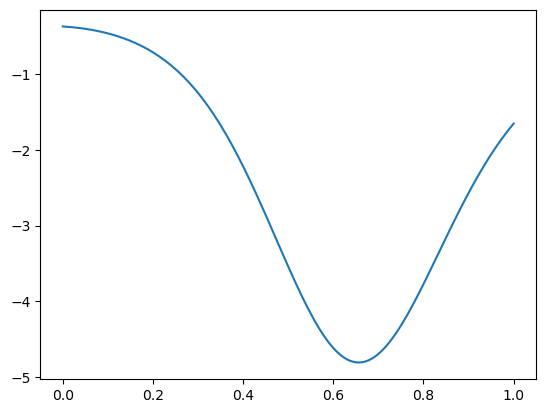

In [3]:
def f2(x):
    return - np.exp(np.arctan(x)- np.cos((5*x)))

X = np.linspace(0,1,150)
plt.plot(X, f2(X))

section(f2, 0,1,0.003)

(1.4141219175553097, 15)

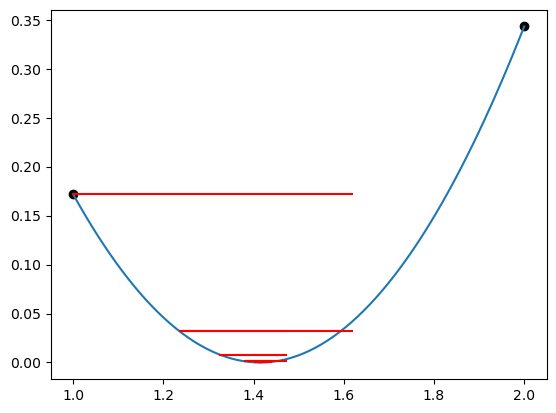

In [4]:
#Visualisation de l'algorithme
def section2(f, a0, b0, tol):
    a = a0
    b = b0
    count = 0
    t =(1+5**0.5)/2
    
    x = np.linspace(a,b,150)
    plt.plot(x,f(x))
    plt.scatter([a,b],[f(a),f(b)], c='black')
    
    while (b-a)>tol:
        x=a+(b-a)/t**2
        y=a+(b-a)/t
        if f(x)<f(y):
            a,b = a,y
        else:
            a,b = x,b
        count+=1
        
        #plt.scatter([a,b],[f(a),f(b)],c='r') 
        plt.plot([a,b],[f(a),f(a)],c='r')
    return((a+b)/2,count)

section2(f, 1, 2, 0.001)

In [5]:
#Comparaison avec la fonction "minimize_scalar" de scipy
from scipy.optimize import minimize_scalar
minimize_scalar(f, method='bounded', bounds=(0,1))

 message: Solution found.
 success: True
  status: 0
     fun: 0.17157781342826997
       x: 0.9999940391390134
     nit: 25
    nfev: 25

(0.738980099068715, 16)

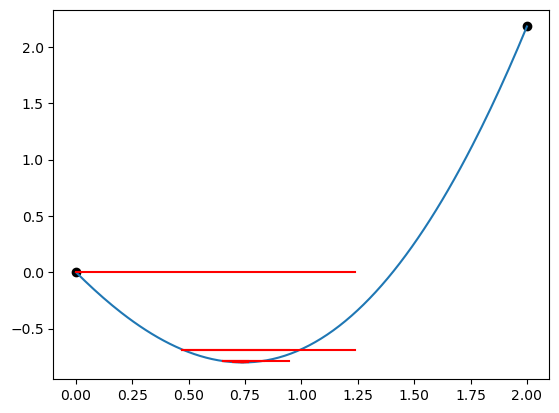

In [6]:
# Autre exemple
def f3(x):
    return x**2 - 2 * np.sin(x)

section2(f3, 0,2,0.001)

In [7]:
#Comparaison avec la fonction "minimize_scalar" de scipy
from scipy.optimize import minimize_scalar
minimize_scalar(f3, method='bounded', bounds=(0,1))

 message: Solution found.
 success: True
  status: 0
     fun: -0.8009772242267538
       x: 0.7390850838167129
     nit: 8
    nfev: 8

(3.0328025086052057, 16)

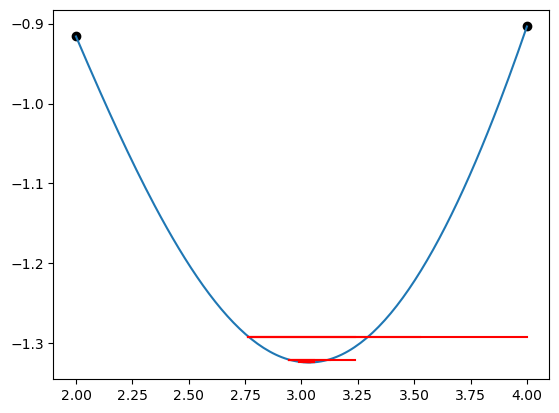

In [8]:
def f4(x):
    return - 1/x + np.cos(x)

section2(f4, 2,4,0.001)


In [9]:
#Comparaison avec la fonction "minimize_scalar" de scipy
from scipy.optimize import minimize_scalar
minimize_scalar(f4, method='bounded', bounds=(0,1))

 message: Solution found.
 success: True
  status: 0
     fun: -167760.00000596052
       x: 5.9608609865491405e-06
     nit: 25
    nfev: 25

(0.6564011350853833, 15)

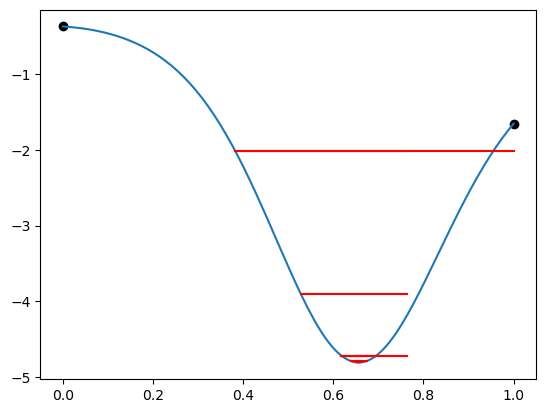

In [10]:
section2(f2, 0,1,0.001)

In [11]:
#Comparaison avec la fonction "minimize_scalar" de scipy
from scipy.optimize import minimize_scalar
minimize_scalar(f4, method='bounded', bounds=(0,1))

 message: Solution found.
 success: True
  status: 0
     fun: -167760.00000596052
       x: 5.9608609865491405e-06
     nit: 25
    nfev: 25

### Exercice 2: Méthode de Newton

In [23]:
from scipy.misc import derivative


def f(x) :
    return (x - np.sqrt(2))**2

In [36]:
def newton(f,a, b, tol):
    #X = np.linspace(a,b,1000)
    i=0
    #x_k = []
    x_k0 = b
    while ( abs(f(x_k0)) > tol  ):
        x_k0 = x_k0 - f(x_k0)/derivative(f,x_k0)
        i+=1
    return x_k0

newton(f, 1, 2, 0.001)

/tmp/ipykernel_3817/270097381.py:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  x_k0 = x_k0 - f(x_k0)/derivative(f,x_k0)


1.4325193885489358

In [40]:
def newton_minimize(f, a, b, tol):
    i=0
    x_k0 = b
    while (abs(derivative(f,x_k0)) > tol):
        x_k0 = x_k0 - derivative(f,x_k0)/derivative(f,x_k0, n=2)
        i+=1
    return x_k0,i

newton_minimize(f, 1,2,0.001)

/tmp/ipykernel_3817/2173241670.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  while (abs(derivative(f,x_k0)) > tol):
/tmp/ipykernel_3817/2173241670.py:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  x_k0 = x_k0 - derivative(f,x_k0)/derivative(f,x_k0, n=2)


(1.4142135623730951, 1)

In [44]:
#Comparaison avec la fonction "fsolve" de scipy
from scipy.optimize import fsolve
fsolve(f,2)

array([1.41421356])

In [45]:
def f2(x):
    return - np.exp(np.arctan(x)- np.cos((5*x)))

newton_minimize(f2, 0,1, 0.001)

/tmp/ipykernel_3817/2173241670.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  while (abs(derivative(f,x_k0)) > tol):
/tmp/ipykernel_3817/2173241670.py:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  x_k0 = x_k0 - derivative(f,x_k0)/derivative(f,x_k0, n=2)


(-1391.725994608683, 1288)

In [46]:
#Comparaison avec la fonction "fsolve" de scipy
from scipy.optimize import fsolve
fsolve(f2,1)

/usr/lib64/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([1.24080813])

In [ ]:
# 